<a href="https://colab.research.google.com/github/NsikakMenim/Machine-Learning-Portfolio./blob/main/heart_disease_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Heart Disease using Machine Learning.

About Dataset

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

Attibute information
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [ ]:
import kagglehub

path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

100%|██████████| 6.18k/6.18k [00:00<00:00, 8.95MB/s]

Extracting files...


In [ ]:
import pandas as pd
import os

filename = "heart.csv"
csv_filepath = os.path.join(path, filename)
df = pd.read_csv(csv_filepath)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### 1. Problem Statement: Predicting if a patient has heart disease given some clinical data

1. Exploratoy Data Analysis
2. XgBoost
3. Support vector
4. Random Forest
5. Neural Network
6. Logistic Regression

# 1. Exploratory Data Analysis
* age: Age in Years
* sex: Sex (1 = Male, 0 = Female)
* cp: Chest Pain Type
    1. typical angina
    2. atypical angina
    3. non-anginal pain
    4. asymptomatic
* trestbps: Resting Blood Pressure (in mm Hg on admission to the hospital)
* chol: Serum Cholesterol in mg/dl
* fbs: Fasting Blood Sugar > 120 mg/dl (1 = True, 0 = False)
* restecg: Resting Electrocardiographic Results
* thalach: Maximum Heart Rate Achieved
* exang: Exercise Induced Angina (1 = Yes, 0 = No)
* oldpeak: ST Depression Induced by Exercise Relative to Rest
* slope: Slope of the Peak Exercise ST Segment
* ca: Number of Major Vessels (0-3) Colored by Fluoroscopy
* thal: 3 = Normal; 6 = Fixed Defect; 7 = Reversible Defect
* target: Diagnosis of Heart Disease (1 = Heart Disease, 0 = No Heart Disease)

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size as needed



In [ ]:
# Create a general function to fit and score models

import numpy as np
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.svm import SVC  # Import SVC
import xgboost as xgb  # Import xgboost (if xgb is intended for XGBoost)

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": xgb.XGBClassifier(objective='binary:logistic', random_state=42)
}


def fit_and_score_models(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score_models(models=models,
                                    X_train=X_train,
                                    X_test=X_test,
                                    y_train=y_train,
                                    y_test=y_test)
model_scores

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366,
 'SVM': 0.6829268292682927,
 'XGBoost': 0.9853658536585366}

* Hyperparameter Tuning
* Feature importance
* Confusion matrix
* Cross-Validation
* Precision
* Recall
* F1 score
* Classification report
* ROC Curve
* Area under the Curve (AUC)

In [ ]:
# prompt: write a code to tune KNN model

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': list(range(1, 31)),  # Test different numbers of neighbors
    'weights': ['uniform', 'distance'],  # Experiment with weighting methods
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Try different distance metrics
    'p': [1, 2] # for minkowski metric
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV or RandomizedSearchCV
# GridSearchCV for exhaustive search (can be slow for large parameter grids)
#grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# RandomizedSearchCV for a faster, randomized search
random_search = RandomizedSearchCV(knn, param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)


# Fit the GridSearchCV or RandomizedSearchCV object to the data
#grid_search.fit(X_train, y_train)
random_search.fit(X_train, y_train)


# Get the best hyperparameters and best score
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best hyperparameters: {best_params}")
print(f"Best cross-validation score: {best_score}")


# Evaluate the best model on the test set
best_knn_model = random_search.best_estimator_
test_accuracy = best_knn_model.score(X_test, y_test)
print(f"Test accuracy of best model: {test_accuracy}")



Best hyperparameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 4, 'metric': 'euclidean'}
Best cross-validation score: 0.9682926829268294
Test accuracy of best model: 0.9853658536585366


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the logarithmic scale for C values
C_values = np.logspace(-4, 4, 20)  # Equivalent to [0.001, 0.01, 0.1, 1, 10, 100]

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'logisticregression__C': C_values,
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['liblinear', 'saga']
}

# Create a pipeline (Scaling + Logistic Regression)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression(max_iter=5000, tol=1e-4, random_state=42))
])

# Initialize GridSearchCV with parallel processing
grid_search_lr = GridSearchCV(
    pipeline, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1, verbose=1
)

# Fit GridSearchCV to the training data
grid_search_lr.fit(X_train, y_train)

# Extract the best hyperparameters and best score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print(f"Best hyperparameters for Logistic Regression: {best_params_lr}")
print(f"Best cross-validation score for Logistic Regression: {best_score_lr:.4f}")

# Evaluate on the test set
test_accuracy_lr = grid_search_lr.best_estimator_.score(X_test, y_test)
print(f"Test accuracy of best Logistic Regression model: {test_accuracy_lr:.4f}")


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best hyperparameters for Logistic Regression: {'logisticregression__C': 0.23357214690901212, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}
Best cross-validation score for Logistic Regression: 0.8512
Test accuracy of best Logistic Regression model: 0.7902


In [ ]:
# prompt: write a code to only tune random classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)


# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_grid_rf,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,
    scoring='accuracy',
    random_state=42,
    verbose=1,
    n_jobs=-1  # Use all available processors
)

# Fit RandomizedSearchCV to the data
random_search_rf.fit(X_train, y_train)


# Get the best hyperparameters and best score
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_

print(f"Best hyperparameters for Random Forest: {best_params_rf}")
print(f"Best cross-validation score for Random Forest: {best_score_rf}")

# Evaluate the best model on the test set
best_rf_model = random_search_rf.best_estimator_
test_accuracy_rf = best_rf_model.score(X_test, y_test)
print(f"Test accuracy of best Random Forest model: {test_accuracy_rf}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best cross-validation score for Random Forest: 0.9817073170731707
Test accuracy of best Random Forest model: 0.9853658536585366


In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the parameter grid with logarithmic scaling
param_grid_svm = {
    'svc__C': np.logspace(-2, 2, 5),  # Equivalent to [0.01, 0.1, 1, 10, 100]
    'svc__gamma': np.logspace(-3, 1, 5),  # Equivalent to [0.001, 0.01, 0.1, 1, 10]
    'svc__kernel': ['rbf', 'poly', 'sigmoid']
}

# Create a pipeline (Scaling + SVM)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Ensures all features have the same scale
    ('svc', SVC(random_state=42))  # Support Vector Machine Classifier
])

# Initialize RandomizedSearchCV for faster tuning
random_search_svm = RandomizedSearchCV(
    pipeline, param_distributions=param_grid_svm,
    n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1, verbose=1
)

# Fit the model to the training data
random_search_svm.fit(X_train, y_train)

# Extract the best hyperparameters and best score
best_params_svm = random_search_svm.best_params_
best_score_svm = random_search_svm.best_score_

print(f"Best hyperparameters for SVM: {best_params_svm}")
print(f"Best cross-validation score for SVM: {best_score_svm:.4f}")

# Evaluate on the test set
test_accuracy_svm = random_search_svm.best_estimator_.score(X_test, y_test)
print(f"Test accuracy of best SVM model: {test_accuracy_svm:.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters for SVM: {'svc__kernel': 'poly', 'svc__gamma': 1.0, 'svc__C': 0.01}
Best cross-validation score for SVM: 0.9744
Test accuracy of best SVM model: 0.9854


In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the parameter grid with logarithmic scaling
param_grid_xgb = {
    'xgbclassifier__max_depth': [3, 5, 7, 10],
    'xgbclassifier__learning_rate': np.logspace(-3, -1, 5),  # [0.001, 0.003, 0.01, 0.03, 0.1]
    'xgbclassifier__n_estimators': [100, 200, 300],
    'xgbclassifier__subsample': [0.6, 0.8, 1.0],
    'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
    'xgbclassifier__gamma': np.logspace(-3, -1, 4),  # [0.001, 0.01, 0.1, 1]
    'xgbclassifier__min_child_weight': [1, 3, 5],
    'xgbclassifier__reg_alpha': [0, 0.01, 0.1]
}

# Create a pipeline (Scaling + XGBoost)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Ensure all features are properly scaled
    ('xgbclassifier', xgb.XGBClassifier(
        objective='binary:logistic',
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

# Initialize RandomizedSearchCV with optimized parameters
random_search_xgb = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid_xgb,
    n_iter=20,  # More iterations for a better search
    cv=5,
    scoring='accuracy',
    random_state=42,
    verbose=2,  # More detailed output during search
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

# Fit RandomizedSearchCV with early stopping
random_search_xgb.fit(X_train, y_train)

# Extract the best hyperparameters and best score
best_params_xgb = random_search_xgb.best_params_
best_score_xgb = random_search_xgb.best_score_

print(f"Best hyperparameters for XGBoost: {best_params_xgb}")
print(f"Best cross-validation score for XGBoost: {best_score_xgb:.4f}")

# Evaluate on the test set
test_accuracy_xgb = random_search_xgb.best_estimator_.score(X_test, y_test)
print(f"Test accuracy of best XGBoost model: {test_accuracy_xgb:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters for XGBoost: {'xgbclassifier__subsample': 0.8, 'xgbclassifier__reg_alpha': 0.1, 'xgbclassifier__n_estimators': 300, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__max_depth': 10, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__gamma': 0.021544346900318832, 'xgbclassifier__colsample_bytree': 0.8}
Best cross-validation score for XGBoost: 0.9817
Test accuracy of best XGBoost model: 0.9854


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:14:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define your base models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
}

# Define a dictionary of hyperparameter grids for each model.
param_grids = {
    "Logistic Regression": {
        'C': np.logspace(-3, 2, 6),
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    "KNN": {
        'n_neighbors': list(range(3, 15, 2)),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    # "SVM": {
    #     'C': np.logspace(-2, 2, 5),
    #     'gamma': np.logspace(-3, 1, 5),
    #     'kernel': ['rbf', 'poly', 'sigmoid']
    # },
    # "XGBoost": {
    #     'max_depth': [3, 5, 7],
    #     'learning_rate': np.logspace(-3, -1, 5),  # e.g., 0.001 to 0.1
    #     'n_estimators': [100, 200, 300],
    #     'subsample': [0.6, 0.8, 1.0],
    #     'colsample_bytree': [0.6, 0.8, 1.0],
    #     'gamma': np.logspace(-3, -1, 4),  # e.g., 0.001 to 1
    #     'min_child_weight': [1, 3, 5],
    #     'reg_alpha': [0, 0.01, 0.1]
    # }
}

def tune_models(models, param_grids, X_train, y_train,
                cv=5, scoring='accuracy', search_type='grid',
                n_iter=10, random_state=42, n_jobs=-1, verbose=1):
    """
    Tune a dictionary of models using GridSearchCV or RandomizedSearchCV.

    Parameters:
      models (dict): Dictionary of model name to model instance.
      param_grids (dict): Dictionary of model name to hyperparameter grid.
      X_train, y_train: Training data.
      cv (int): Number of cross-validation folds.
      scoring (str): Scoring metric.
      search_type (str): 'grid' for GridSearchCV or 'random' for RandomizedSearchCV.
      n_iter (int): Number of iterations for RandomizedSearchCV.
      random_state (int): Random state for reproducibility.
      n_jobs (int): Number of jobs to run in parallel.
      verbose (int): Verbosity level for the search.

    Returns:
      dict: Dictionary of model name to the tuned (best) model.
    """
    tuned_models = {}
    for name, model in models.items():
        print(f"Tuning {name}...")
        if name not in param_grids:
            print(f"No parameter grid for {name}, skipping tuning.")
            tuned_models[name] = model
            continue

        param_grid = param_grids[name]
        if search_type == 'grid':
            search = GridSearchCV(
                model, param_grid, cv=cv, scoring=scoring,
                n_jobs=n_jobs, verbose=verbose
            )
        elif search_type == 'random':
            search = RandomizedSearchCV(
                model, param_distributions=param_grid, n_iter=n_iter, cv=cv,
                scoring=scoring, random_state=random_state, n_jobs=n_jobs, verbose=verbose
            )
        else:
            raise ValueError("search_type must be either 'grid' or 'random'")

        search.fit(X_train, y_train)
        tuned_models[name] = search.best_estimator_
        print(f"Best parameters for {name}: {search.best_params_}")
        print(f"Best CV score for {name}: {search.best_score_:.4f}\n")
    return tuned_models

# Example usage:
tuned_models = tune_models(models, param_grids, X_train, y_train, search_type='random')
# Now you can evaluate each tuned model on the test set:
for name, model in tuned_models.items():
    score = model.score(X_test, y_test)
    print(f"Test accuracy for {name}: {score:.4f}")


Tuning Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10.0}
Best CV score for Logistic Regression: 0.8524

Tuning KNN...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan'}
Best CV score for KNN: 0.9707

Tuning Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 20}
Best CV score for Random Forest: 0.9744

Test accuracy for Logistic Regression: 0.7951
Test accuracy for KNN: 0.9854
Test accuracy for Random Forest: 0.9854


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define your base models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
}

# Define a dictionary of hyperparameter grids for each model.
param_grids = {
    "Logistic Regression": {
        'C': np.logspace(-3, 2, 6),
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    "KNN": {
        'n_neighbors': list(range(3, 15, 2)),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    # "SVM": {
    #     'C': np.logspace(-2, 2, 5),
    #     'gamma': np.logspace(-3, 1, 5),
    #     'kernel': ['rbf', 'poly', 'sigmoid']
    # },
    # "XGBoost": {
    #     'max_depth': [3, 5, 7],
    #     'learning_rate': np.logspace(-3, -1, 5),  # e.g., 0.001 to 0.1
    #     'n_estimators': [100, 200, 300],
    #     'subsample': [0.6, 0.8, 1.0],
    #     'colsample_bytree': [0.6, 0.8, 1.0],
    #     'gamma': np.logspace(-3, -1, 4),  # e.g., 0.001 to 1
    #     'min_child_weight': [1, 3, 5],
    #     'reg_alpha': [0, 0.01, 0.1]
    # }
}

def tune_models(models, param_grids, X_train, y_train,
                cv=5, scoring='accuracy', search_type='grid',
                n_iter=10, random_state=42, n_jobs=-1, verbose=1):
    """
    Tune a dictionary of models using GridSearchCV or RandomizedSearchCV.

    Parameters:
      models (dict): Dictionary of model name to model instance.
      param_grids (dict): Dictionary of model name to hyperparameter grid.
      X_train, y_train: Training data.
      cv (int): Number of cross-validation folds.
      scoring (str): Scoring metric.
      search_type (str): 'grid' for GridSearchCV or 'random' for RandomizedSearchCV.
      n_iter (int): Number of iterations for RandomizedSearchCV.
      random_state (int): Random state for reproducibility.
      n_jobs (int): Number of jobs to run in parallel.
      verbose (int): Verbosity level for the search.

    Returns:
      dict: Dictionary of model name to the tuned (best) model.
    """
    tuned_models = {}
    for name, model in models.items():
        print(f"Tuning {name}...")
        if name not in param_grids:
            print(f"No parameter grid for {name}, skipping tuning.")
            tuned_models[name] = model
            continue

        param_grid = param_grids[name]
        if search_type == 'grid':
            search = GridSearchCV(
                model, param_grid, cv=cv, scoring=scoring,
                n_jobs=n_jobs, verbose=verbose
            )
        elif search_type == 'random':
            search = RandomizedSearchCV(
                model, param_distributions=param_grid, n_iter=n_iter, cv=cv,
                scoring=scoring, random_state=random_state, n_jobs=n_jobs, verbose=verbose
            )
        else:
            raise ValueError("search_type must be either 'grid' or 'random'")

        search.fit(X_train, y_train)
        tuned_models[name] = search.best_estimator_
        print(f"Best parameters for {name}: {search.best_params_}")
        print(f"Best CV score for {name}: {search.best_score_:.4f}\n")
    return tuned_models

# Example usage:
tuned_models = tune_models(models, param_grids, X_train, y_train, search_type='grid')
# Now you can evaluate each tuned model on the test set:
for name, model in tuned_models.items():
    score = model.score(X_test, y_test)
    print(f"Test accuracy for {name}: {score:.4f}")


Tuning Logistic Regression...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Logistic Regression: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV score for Logistic Regression: 0.8549

Tuning KNN...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best CV score for KNN: 0.9707

Tuning Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score for Random Forest: 0.9817

Test accuracy for Logistic Regression: 0.7854
Test accuracy for KNN: 0.9854
Test accuracy for Random Forest: 0.9854


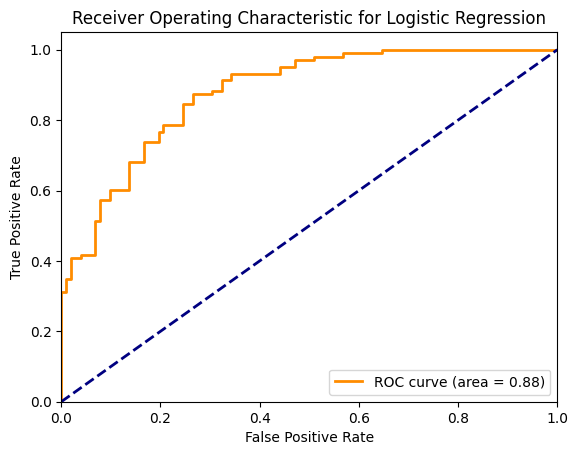

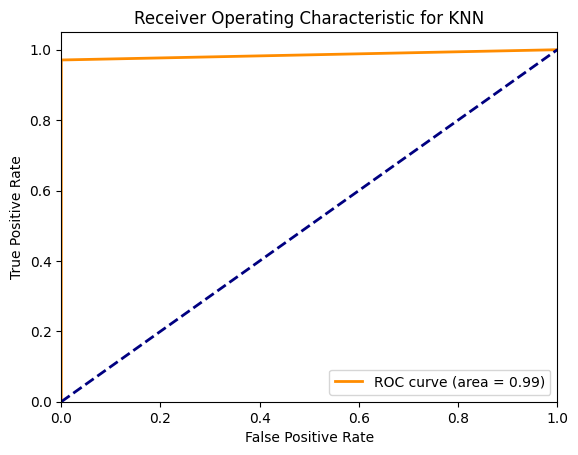

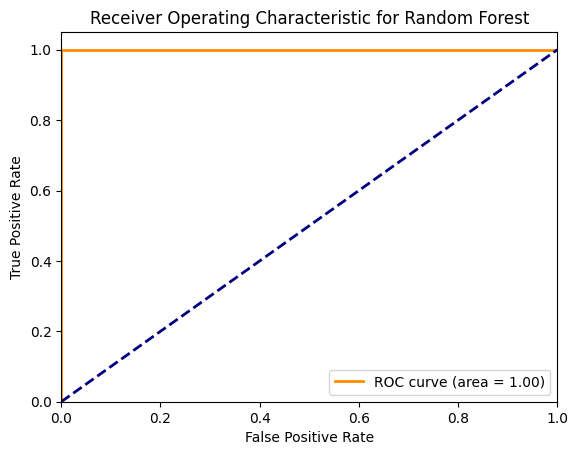

In [ ]:
# prompt: plot roc curve and calculate auc metric

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'tuned_models' and 'X_test', 'y_test' are defined from the previous code
for name, model in tuned_models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {name}')
    plt.legend(loc="lower right")
    plt.show()


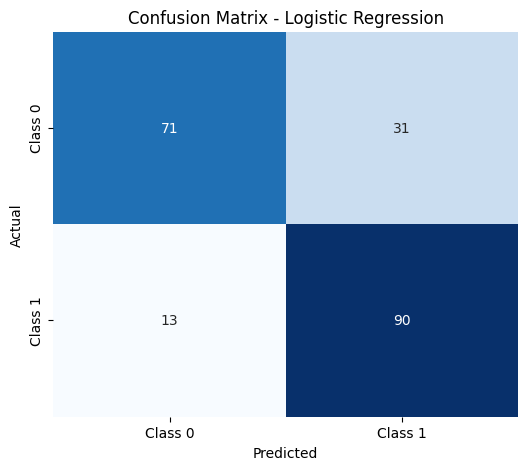

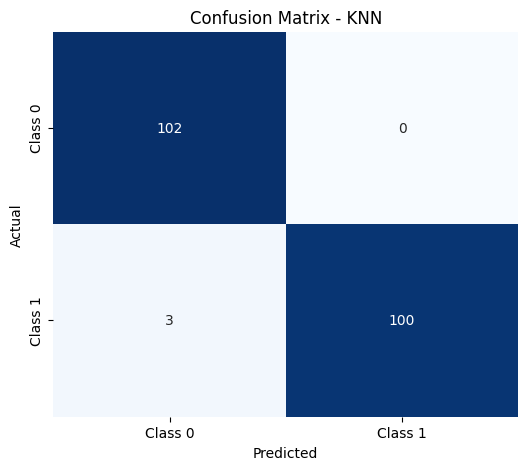

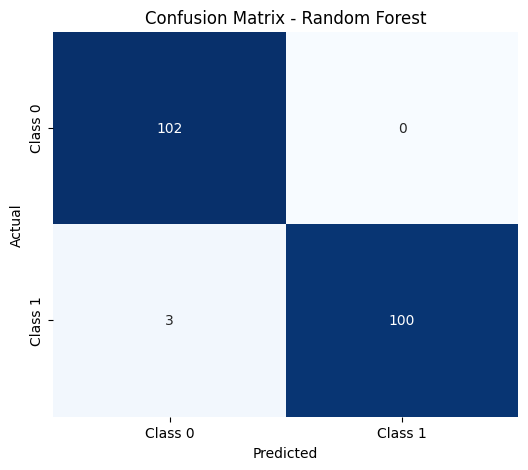

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, labels=None, model_name="Model"):
    """Plots a confusion matrix using Seaborn heatmap."""
    cm = confusion_matrix(y_true, y_pred)
    labels = labels if labels else [f'Class {i}' for i in range(cm.shape[0])]

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels, cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Example usage
models_to_evaluate = ['Logistic Regression', 'KNN', 'Random Forest']

for model_name in models_to_evaluate:
    y_pred = tuned_models[model_name].predict(X_test)
    plot_confusion_matrix(y_test, y_pred, labels=['Class 0', 'Class 1'], model_name=model_name)


In [ ]:
# prompt: get the classification report as well as cross-validated precision, recall and f1-score

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns


for name, model in tuned_models.items():
    print(f"Classification Report for {name}:\n")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Cross-validated metrics
    precision_cv = cross_val_score(model, X_train, y_train, cv=5, scoring='precision')
    recall_cv = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
    f1_cv = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

    print(f"\nCross-Validated Metrics for {name}:")
    print(f"Precision: {precision_cv.mean():.4f} (+/- {precision_cv.std() * 2:.4f})")
    print(f"Recall: {recall_cv.mean():.4f} (+/- {recall_cv.std() * 2:.4f})")
    print(f"F1-score: {f1_cv.mean():.4f} (+/- {f1_cv.std() * 2:.4f})\n")


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205


Cross-Validated Metrics for Logistic Regression:
Precision: 0.8298 (+/- 0.0927)
Recall: 0.9078 (+/- 0.0663)
F1-score: 0.8662 (+/- 0.0631)

Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Cross-Validated Metrics for KNN:
Precision: 0.9747 (+/- 0.0460)
Recall: 0.9693 (+/- 0.0382)
F1-score: 0.9716 (+/- 0.0188)

Cl